# Entregables:

- Un Jupyter notebook (informe/data report) con todos los aspectos detallados del trabajo, con los códigos y comentarios

- Una presentación (data presentation) sobre el trabajo


Ambos documentos (informe de datos y presentación) deben indicar claramente la participación y contribución de cada miembro del grupo. Del mismo modo, debe reflejarse una participación igualitaria durante la presentación oral.



Cada integrante del grupo deberá realizar la entrega a través del aula virtual (a efectos de registro del examen de cada uno). La documentación entregada por cada integrante de un grupo deberá ser la misma.

Fecha límite de entrega de la documentación a través del aula virtual (informe de datos con código y presentación): lunes 4 de noviembre 2024 10:00

Presentación oral (máximo 30 minutos por grupo): lunes 4 de noviembre 18:30 (horario de clase)


# **----- CONSIGNA -------**

Recientemente, se han publicado titulares sobre la población de un pequeño pueblo que ha empezado a mostrar cifras alarmantes de cáncer de tiroides, significativamente superiores a la media nacional en los últimos cinco años. El Ministerio de Salud Pública quiere poner en marcha una campaña especial para controlarlo. Antes de iniciar su programa especial, el ministerio tiene en sus manos un conjunto de datos clínicos específicos de la población del pueblo, que contiene características clinicopatológicas destinadas a predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló durante un período de 15 años y se hizo un seguimiento de cada paciente durante al menos 10 años. Basándose en los datos clínicos, además de analizar la posibilidad de predecir la recurrencia del cáncer de tiroides, el objetivo es generar conocimientos que puedan ser valiosos para los responsables de las políticas y las stakeholders del ministerio antes de poner en marcha la campaña sanitaria especial.

# **OBJETIVOS**

 * predecir la recurrencia del cáncer de tiroides
 * generar conocimientos que puedan ser valiosos

CARGA DE LIBRERIAS

In [ ]:
#LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from itertools import combinations
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CARGA DE ARCHIVO

In [ ]:
#cargamos el archivo
!pip install openpyxl
archivo = '/content/drive/MyDrive/IFTS/EXPDATOS/TP PARCIAL/Dataset (1).xlsx' #ingresamos la ruta del archivo
df = pd.read_excel(archivo) #definimos el data frame

PRIMERA VISTA DEL ARCHIVO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   393 non-null    int64 
 1   Gender                393 non-null    object
 2   Smoking               392 non-null    object
 3   Hx Smoking            392 non-null    object
 4   Hx Radiothreapy       392 non-null    object
 5   Thyroid Function      393 non-null    object
 6   Physical Examination  393 non-null    object
 7   Adenopathy            393 non-null    object
 8   Pathology             393 non-null    object
 9   Focality              393 non-null    object
 10  Risk                  392 non-null    object
 11  T                     393 non-null    object
 12  N                     393 non-null    object
 13  M                     393 non-null    object
 14  Stage                 392 non-null    object
 15  Response              393 non-null    ob

#### El conjunto de datos consta de las siguientes características:

* Edad: La edad del paciente en el momento del diagnóstico o tratamiento.

* Sexo: El sexo del paciente

* Tabaquismo: Si el paciente es fumador o no.

* Antecedentes de tabaquismo: Historial de tabaquismo del paciente (p. ej., si alguna vez ha fumado).

* Antecedentes de radioterapia: Historial de tratamiento con radioterapia para cualquier afección.

* Función tiroidea: El estado de la función tiroidea, que posiblemente indique si hay alguna anomalía.

* Examen físico: Hallazgos de un examen físico del paciente, que puede incluir la palpación de la glándula tiroides y las estructuras   circundantes.

* Adenopatía: Presencia o ausencia de ganglios linfáticos agrandados (adenopatía) en la región del cuello.

* Patología: Tipos específicos de cáncer de tiroides según lo determinado por el examen patológico de muestras de biopsia.

* Focalidad: Si el cáncer es unifocal (limitado a una ubicación) o multifocal (presente en múltiples ubicaciones).

* Riesgo: La categoría de riesgo del cáncer basada en varios factores, como el tamaño del tumor, la extensión de la propagación y el tipo histológico.

* T: Clasificación del tumor según su tamaño y grado de invasión de las estructuras cercanas.

* N: Clasificación ganglionar que indica la afectación de los ganglios linfáticos.

* M: Clasificación de metástasis que indica la presencia o ausencia de metástasis a distancia.

* Estadio: Estadio general del cáncer, que generalmente se determina combinando las clasificaciones T, N y M.

* Respuesta: Respuesta al tratamiento, que indica si el cáncer respondió de manera positiva, negativa o permaneció estable después del tratamiento.

* Recurrencia: Indica si el cáncer ha reaparecido después del tratamiento inicial.

VISTA PLANILLA DE ARCHIVO

In [ ]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


VAMOS A ANALIZAR 1 A 1 LAS COLUMNAS (YA QUE SON POCAS)

In [ ]:
''' 'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred' '''
# print (df.columns)
# for i in df.columns:
#  print (df[i].unique())

df['Recurred'].unique()

array(['No', 'Yes', 0, 1], dtype=object)

DE ESTAS VISTAS OBTENEMOS LO SIGUIENTE:
* AGE TIENE VALORES MAL INGRESADOS
* GENDER TIENE VALORES F, M, BINARIOS, Y MAL INGRESADOS.
* SMOKING TIENEN YES, NO, Y NAN.
* HX SMOKING TIENE 'No' 'Yes' 1 0 'O' nan
* Hx Radiothreapy, 'No', 'Yes', 'O', nan
* Thyroid Function, AVERIGUAR QUE ES "SH" Y "C"
* Physical Examination, 'Mng', 'N', 'Ok'
* Adenopathy, VER QUE ES "0"
* Pathology, VER QUE ES 'MP', 'MO', "P" Y "P ."
* Focality SON 2 CRITERIOS, HAY QUE HOMOLOGARLOS.
* Risk HOMOLOGAR CRITERIOS (ALFABETICOS - NUMERICOS)
* T: ESTANDARIZAR 'T3a', 'T-3-a', 'T 3 a '
* N: RESOLVER 'N0', 'No'
* M: RESOLVER EL 3ER VALOR.
* Stage: ESTANDARIZAR ESTA.
* Response: ESTA OK
* Recurred: ESTANDARIZAR ESTA.

In [ ]:
df_ordenado = df.sort_values(by='Age', ascending=False)
df_ordenado

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
371,510,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,High,T4a,N1a,M1,II,Structural Incomplete,Yes
346,320,M,No,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,I,Structural Incomplete,Yes
357,260,F,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Hurthel cell,Multi-Focal,High,T4a,N1b,M0,I,Structural Incomplete,Yes
342,222,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3b,N1a,M0,I,Structural Incomplete,Yes
347,82,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes
207,17,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
81,17,F,No,1,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
226,17,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T2,N0,M0,I,Structural Incomplete,Yes


PARA LA EDAD CONCLUIMOS QUE LOS VALORES IRREALES, SE DAN POR UN ERROR DE TIPEO:
* TIENEN DE SOBRA EL TERCER DIGITO, POR EJEMPLO: SI EL NUMERO ES 510, LA EDAD REAL ES 51

In [ ]:
#CREAMOS UNA FUNCION PARA REMOVBER EL TERCER DIGITO.
df['Age'] = df['Age'].apply(lambda x: int(str(x)[:2]) if len(str(x)) == 3 else x)

VERIFICAMOS NO TENER MAS ANOMALIAS EN EDADES.

In [ ]:
df_ordenado = df.sort_values(by='Age', ascending=False)
df_ordenado

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
347,82,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete,Yes
276,81,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,II,Excellent,No
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
362,80,F,Yes,Yes,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,III,Structural Incomplete,Yes
367,80,M,Yes,No,No,Euthyroid,Single nodular goiter-left,No,Hurthel cell,Multi-Focal,1,T4a,N0,M0,II,Structural Incomplete,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,18,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T1b,N1b,M0,I,Structural Incomplete,Yes
226,17,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T2,N0,M0,I,Structural Incomplete,Yes
81,17,F,No,1,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
207,17,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No


In [ ]:
print (df['Age'].unique())

[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]


FINALIZAMOS CON EDADES.

# **SEGUIMOS CON GENDER**

In [ ]:
print (df['Gender'].unique())

['F' 'M' 1 0 'MM' 'MF']


In [ ]:
df['Gender'].value_counts()

,count
Gender,
F,319
M,68
0,3
1,1
MM,1
MF,1


UTILIZAMOS EL SIGUIENTE CRITERIO (EN BASE A SU PROPORCION DE NUMEROS):
* 0 = FEMENINO
* 1 = MASCULINO
* MM = MASCULINO
* MF = FEMENINO

In [ ]:
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1, 'MM': 1, 'MF': 0})

<ipython-input-12-c724f3470970>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1, 'MM': 1, 'MF': 0})


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,323
1,70


FINALIZAMOS GENDER

# **SEGUIMOS CON SMOKING**

In [ ]:
df['Smoking'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
print (df[df['Smoking'].isna()])

     Age  Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
386   50       0     NaN        NaN             NaN        Euthyroid   

            Physical Examination Adenopathy  Pathology   Focality Risk   T  \
386  Single nodular goiter-right      Right  Papillary  Uni-Focal    1  T2   

       N   M Stage       Response Recurred  
386  N1b  M0     I  Indeterminate       No  


BAJO EL CRITERIO GENERAL, YA QUE HAY 3 COLUMNAS DEL MISMO REGISTRO CON VALORES NAN, SE DEFINE ELIMINAR EL REGISTRO EN SU TOTALIDAD PARA NO ALTERAR EL ESTUDIO.

In [ ]:
#DROPEAMOS EL REGISTRO.
df = df.dropna(subset=['Smoking'])

In [ ]:
#REEMPLAZAMOS:
#          "NO" POR "0"
#          "SI" POR "1"

df['Smoking'] = df['Smoking'].replace({'No': 0, 'Yes': 1})

<ipython-input-17-ced77f891e69>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking'] = df['Smoking'].replace({'No': 0, 'Yes': 1})
<ipython-input-17-ced77f891e69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking'] = df['Smoking'].replace({'No': 0, 'Yes': 1})


TERMINAMOS CON SMOKING

# **SEGUIMOS CON 'Hx Smoking'**

In [ ]:
df['Hx Smoking'].value_counts()

,count
Hx Smoking,
No,356
Yes,26
0,8
1,1
O,1


VAMOS A REEMPLAZAR CON EL SIGUIENTE CRITERIO:
* NO = 0
* O = 0
* YES = 1

In [ ]:
df['Hx Smoking'] = df['Hx Smoking'].replace({'No': 0, 'O': 0, 'Yes': 1})

<ipython-input-19-86b45fdf1ec6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hx Smoking'] = df['Hx Smoking'].replace({'No': 0, 'O': 0, 'Yes': 1})
<ipython-input-19-86b45fdf1ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hx Smoking'] = df['Hx Smoking'].replace({'No': 0, 'O': 0, 'Yes': 1})


TERMINAMOS CON HX SMOKING

# **SEGUIMOS CON 'Hx Radiothreapy'**

In [ ]:
df['Hx Radiothreapy'].unique()

array(['No', 'Yes', 'O'], dtype=object)

MISMO CRITERIO QUE EL ANTERIOR

In [ ]:
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].replace({'No': 0, 'O': 0, 'Yes': 1})

<ipython-input-21-a373398f33b3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hx Radiothreapy'] = df['Hx Radiothreapy'].replace({'No': 0, 'O': 0, 'Yes': 1})
<ipython-input-21-a373398f33b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hx Radiothreapy'] = df['Hx Radiothreapy'].replace({'No': 0, 'O': 0, 'Yes': 1})


In [ ]:
df['Hx Radiothreapy'].value_counts()

,count
Hx Radiothreapy,
0,385
1,7


TERMINAMOS CON 'Hx Radiothreapy

SEGUIMOS CON Thyroid Function

In [ ]:
df['Thyroid Function'].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism', 'SH',
       'C '], dtype=object)

In [ ]:
df['Thyroid Function'].value_counts()

,count
Thyroid Function,
Euthyroid,337
Clinical Hyperthyroidism,22
Subclinical Hypothyroidism,14
Clinical Hypothyroidism,12
Subclinical Hyperthyroidism,5
SH,1
C,1


SEGUN DIVERSAS PAGINAS ACADEMICAS SH (MAYUSCULA) SUELE SIGNIFICAR "HYPERTIROIDISMO".
ASIMISMO LA C, NO IMPLICA NADA, POR LO QUE DEBERA DESCARTARSE

In [ ]:
#DESCARTAMOS LA C.
df = df[df['Thyroid Function'] != 'C ']

In [ ]:
df['Thyroid Function'].value_counts()

,count
Thyroid Function,
Euthyroid,337
Clinical Hyperthyroidism,22
Subclinical Hypothyroidism,14
Clinical Hypothyroidism,12
Subclinical Hyperthyroidism,5
SH,1


In [ ]:
#REEMPLAZAMOS EL SH COMO HIPERTIROIDISMO
df['Thyroid Function'] = df['Thyroid Function'].replace({'SH': 'Subclinical Hypothyroidism'})

In [ ]:
df['Thyroid Function'].value_counts()

,count
Thyroid Function,
Euthyroid,337
Clinical Hyperthyroidism,22
Subclinical Hypothyroidism,15
Clinical Hypothyroidism,12
Subclinical Hyperthyroidism,5


VAMOS A UTILIZAR EL SIGUIENTE DICCIONARIO:
0 = Euthyroid
1 = Clinical Hyperthyroidism
2 = Subclinical Hypothyroidism
3 = Clinical Hypothyroidism
4 = Subclinical Hyperthyroidism

In [ ]:
df['Thyroid Function'] = df['Thyroid Function'].replace({'Euthyroid': 0, 'Clinical Hyperthyroidism': 1, 'Subclinical Hypothyroidism': 2, 'Clinical Hypothyroidism': 3, 'Subclinical Hyperthyroidism': 4})

<ipython-input-29-5b18abd5a030>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Thyroid Function'] = df['Thyroid Function'].replace({'Euthyroid': 0, 'Clinical Hyperthyroidism': 1, 'Subclinical Hypothyroidism': 2, 'Clinical Hypothyroidism': 3, 'Subclinical Hyperthyroidism': 4})


In [ ]:
df['Thyroid Function'].value_counts()

,count
Thyroid Function,
0,337
1,22
2,15
3,12
4,5


FINALIZAMOS CON THYROID FUNCTION

SEGUIMOS CON "Physical Examination"

In [ ]:
df['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Mng', 'Normal', 'Diffuse goiter',
       'N', 'Single nodular gr', 'Ok', 'Single nodular goiterright',
       'Single nodular goiterleft'], dtype=object)

In [ ]:
df['Physical Examination'].value_counts()

,count
Physical Examination,
Single nodular goiter-right,143
Multinodular goiter,140
Single nodular goiter-left,88
Diffuse goiter,7
Normal,5
Single nodular gr,2
Single nodular goiterleft,2
Mng,1
N,1


USAREMOS EL SIGUIENTE CRITERIO:
* Single nodular goiter-right, esta ok
* Multinodular goiter, esta ok
* Single nodular goiter-left, esta ok
* Diffuse goiter, esta ok
* Normal, esta ok
* Single nodular gr = Single nodular goiter-right
* Single nodular goiterleft = Single nodular goiter-left
* Mng = Multinodular goiter
* N = Normal
* Ok = Normal
* Single nodular goiterright = Single nodular goiter-right

In [ ]:
reemplazos = {
    'Single nodular gr': 'Single nodular goiter-right',
    'Single nodular goiterleft': 'Single nodular goiter-left',
    'Mng': 'Multinodular goiter',
    'N': 'Normal',
    'Ok': 'Normal',
    'Single nodular goiterright': 'Single nodular goiter-right'
}

# Reemplaza los valores en la columna 'Physical Examination'
df['Physical Examination'] = df['Physical Examination'].replace(reemplazos)

In [ ]:
df['Physical Examination'].value_counts()

,count
Physical Examination,
Single nodular goiter-right,146
Multinodular goiter,141
Single nodular goiter-left,90
Normal,7
Diffuse goiter,7


VAMOS A HACER UN DICCIONARIO CON EL SIGUIENTE CRITERIO:
* 0 = Diffuse goiter
* 1 = NORMAL
* 2 = Single nodular goiter-right
* 3 = Single nodular goiter-left
* 4 = Multinodular goiter

In [ ]:
df['Physical Examination'] = df['Physical Examination'].replace({'Diffuse goiter': 0, 'Normal': 1, 'Single nodular goiter-right': 2, 'Single nodular goiter-left': 3, 'Multinodular goiter': 4})

<ipython-input-35-e7f59c113d44>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Physical Examination'] = df['Physical Examination'].replace({'Diffuse goiter': 0, 'Normal': 1, 'Single nodular goiter-right': 2, 'Single nodular goiter-left': 3, 'Multinodular goiter': 4})


TERMINAMOS CON 'Physical Examination'

SEGUIMOS CON 'Adenopathy'

In [ ]:
df['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 0, 'Left.',
       'Posterior'], dtype=object)

In [ ]:
df['Adenopathy'].value_counts()

,count
Adenopathy,
No,273
Right,52
Bilateral,33
Left,17
Extensive,7
0,6
Posterior,2
Left.,1


UTILIZAREMOS EL SIGUIENTE CRITERIO
0 = No
Left. = Left

In [ ]:
df['Adenopathy'] = df['Adenopathy'].replace({'No': 0, 'Left.': 'Left'})

In [ ]:
df['Adenopathy'].value_counts()

,count
Adenopathy,
0,279
Right,52
Bilateral,33
Left,18
Extensive,7
Posterior,2


HACEMOS EL SIGUIENTE DICCIONARIO:
* No = 0
* Right = 1
* Left = 2
* Bilateral = 3
* Posterior = 4
* Extensive = 5

In [ ]:
df['Adenopathy'] = df['Adenopathy'].replace({'Right': 1, 'Left': 2, 'Bilateral': 3, 'Posterior': 4, 'Extensive': 5})

<ipython-input-40-5cbcf10b223d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Adenopathy'] = df['Adenopathy'].replace({'Right': 1, 'Left': 2, 'Bilateral': 3, 'Posterior': 4, 'Extensive': 5})


TERMINAMOS 'Adenopathy'

SEGUIMOS CON Pathology

In [ ]:
df['Pathology'].unique()

array(['Micropapillary', 'MP', 'MO', 'Papillary', 'Follicular',
       'Hurthel cell', 'P', 'P .'], dtype=object)

In [ ]:
df['Pathology'].value_counts()

,count
Pathology,
Papillary,293
Micropapillary,46
Follicular,28
Hurthel cell,19
P,2
MP,1
MO,1
P .,1


VAMOS A HACER LAS SIGUIENTES RELACIONES:
* Papillary
* Micropapillary
* Follicular
* Hurthel cell
* P = Papillary
* MP = Micropapillary
* MO = Micropapillary
* P . = Papillary

In [ ]:
df['Pathology'] = df['Pathology'].replace({'P .': 'Papillary', 'MO': 'Micropapillary', 'MP': 'Micropapillary', 'P': 'Papillary'})

VAMOS A HACER EL SIGUIENTE DICCIONARIO:
* 0 = Papillary
* 1 = Micropapillary
* 2 = Follicular
* 3 = Hurthel cell

In [ ]:
df['Pathology'] = df['Pathology'].replace({'Papillary': 0, 'Micropapillary': 1, 'Follicular': 2, 'Hurthel cell': 3})

<ipython-input-44-2f7140889ee6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pathology'] = df['Pathology'].replace({'Papillary': 0, 'Micropapillary': 1, 'Follicular': 2, 'Hurthel cell': 3})


TERMINAMOS CON PATHOLOGY

SEGUIMOS CON 'Focality'

In [ ]:
df['Focality'].value_counts()

,count
Focality,
Uni-Focal,252
Multi-Focal,136
MultiFocal,1
UF,1
UniFocal,1


DEFINIMOS LO SIGUIENTE:
* 0 = Uni-Focal = UniFocal = UF
* 1 = Multi-Focal = MultiFocal



In [ ]:
df  = df.replace({'Uni-Focal': '0', 'UniFocal': '0', 'UF': '0', 'Multi-Focal': '1', 'MultiFocal':'1' })

In [ ]:
df['Focality'].value_counts()

,count
Focality,
0,254
1,137


In [ ]:
df['Focality'] = df['Focality'].astype(int)

TERMINAMOS CON FOCALITY

SEGUIMOS CON 'Risk'

In [ ]:
df['Risk'].unique()

array(['Low', nan, 0, 'Intermediate', 'Lo', 'High', 'High.', 1, 2],
      dtype=object)

In [ ]:
df['Risk'].value_counts()

,count
Risk,
Low,244
Intermediate,105
High,28
0,6
2,3
1,2
Lo,1
High.,1


USAREMOS EL SIGUIENTE CRITERIO:
* 0 = Low = Lo
* 1 = Intermediate
* 2 = High = High.

In [ ]:
df['Risk'] = df['Risk'].replace({'Lo': 0,'Low':0, 'Intermediate': 1, 'High':2, 'High.': 2})

<ipython-input-51-b49a7e79b998>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Risk'] = df['Risk'].replace({'Lo': 0,'Low':0, 'Intermediate': 1, 'High':2, 'High.': 2})


In [ ]:
df['Risk'].value_counts()

,count
Risk,
0.0,251
1.0,107
2.0,32


In [ ]:
df['Risk'].isna().sum()

1

In [ ]:
# Supongamos que el DataFrame se llama 'df'
nan_rows = df[df['Risk'].isna()]

# Imprimir las filas que contienen NaN en la columna 'Risk'
print(nan_rows)

    Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
11   59       0        0           0                0                 0   

    Physical Examination  Adenopathy  Pathology  Focality  Risk    T   N   M  \
11                     3           0          1         0   NaN  T1a  N0  M0   

   Stage   Response Recurred  
11     I  Excellent       No  


In [ ]:
print (df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [ ]:
filtro = (
    (df['Age'].between(55, 65)) &      # Edad entre 55 y 65
    (df['Gender'] == 0) &              # Género igual a 0
    (df['Smoking'] == 0) &             # Fumar igual a 0
    (df['Hx Smoking'] == 0) &          # Antecedentes de fumar igual a 0
    (df['Thyroid Function'] == 0) &    # Función tiroidea igual a 0
    (df['Physical Examination'].isin([2, 3]))  # Examen físico igual a 2 o 3
)

# Filtra el DataFrame con los criterios establecidos
df_filtrado = df[filtro]

# Imprimir el DataFrame filtrado
print(df_filtrado)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
3     62       0        0           0                0                 0   
11    59       0        0           0                0                 0   
91    62       0        0           0                0                 0   
92    62       0        0           0                0                 0   
109   60       0        0           0                0                 0   
127   56       0        0           0                0                 0   
167   55       0        0           0                0                 0   
185   56       0        0           0                0                 0   
223   56       0        0           0                0                 0   
235   60       0        0           0                0                 0   
236   62       0        0           0                0                 0   
285   62       0        0           0                0                 0   
295   56    

ANALIZANDO LA TABLA EN PROFUNDIDAD ENTENDEMOS LO SIGUIENTE:
* MIRANDO LAS COLUMNAS VEMOS QUE CUANDO:
  * RECURRED = NO
  * RESPONSE = EXCELLENT
  * T = T1a     
  * N = N0
  * M = M0
  
  RISK ES 0

* EN EL CASO DE NUESTRO NAN, LAS COLUMNAS COINCIDEN EN EL PATRON, POR LO QUE VAMOS A DEJAR EL NAN EN 0.


In [ ]:
df['Risk'] = df['Risk'].fillna(0)

TERMINAMOS CON RISK

SEGUIMOS CON 'T'

In [ ]:
df['T'].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T-3-a', 'T 3 a ', 'T3b', 'T4a', 'T4b'],
      dtype=object)

In [ ]:
df['T'].value_counts()

,count
T,
T2,160
T3a,94
T1a,49
T1b,43
T4a,20
T3b,15
T4b,8
T-3-a,1
T 3 a,1


CREAMOS EL SIGUIENTE DICCIONARIO SEGUN NUESTRO CRITERIO:
* 0 = 'T1a'
* 1 = 'T1b'
* 2 = 'T2'
* 3 = 'T3a' = 'T-3-a' = 'T 3 a '
* 4 = 'T3b'
* 5 = 'T4a'
* 6 = 'T4b'


In [ ]:
df['T'] = df['T'].replace({'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T-3-a': 3, 'T 3 a ': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6})

<ipython-input-60-b29460ec5629>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['T'] = df['T'].replace({'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T-3-a': 3, 'T 3 a ': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6})


TERMINAMOS CON T

SEGUIMOS CON N

In [ ]:
df['N'].value_counts()

,count
N,
N0,263
N1b,98
N1a,26
No,4


UTILIZAMOS EL SIGUIENTE CRITERIO:
* 0 = N0 = No
* 1 = N1a
* 2 = N1b

In [ ]:
df['N'] = df['N'].replace({'N0': 0, 'No':0, 'N1a': 1, 'N1b': 2})

<ipython-input-62-1de58bd5ed19>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['N'] = df['N'].replace({'N0': 0, 'No':0, 'N1a': 1, 'N1b': 2})


TERMINAMOS CON N

SEGUIMOS CON M

In [ ]:
df['M'].value_counts()

,count
M,
M0,372
M1,18
Mo,1


UTILIZAMOS EL SIGUIENTE CRITERIO:
* 0 = M0 = Mo
* 1 = M1

In [ ]:
df['M'] = df['M'].replace({'M0': 0, 'Mo': 0, 'M1': 1})

<ipython-input-64-43fa27e7f685>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['M'] = df['M'].replace({'M0': 0, 'Mo': 0, 'M1': 1})


TERMINAMOS CON M

SEGUIMOS CON 'Stage'

In [ ]:
df['Stage'].value_counts()

,count
Stage,
I,334
II,33
IVB,10
1,4
III,4
IVA,2
5,1
4b,1
4alpha,1


UTILIZAREMOS EL SIGUIENTE CRITERIO:

* 1 = I
* 2 = II
* 3 = III
* 4 = IVA, 4alpha
* 5 = IVB, 4b
* 6 = 5

In [ ]:
fila_stage_5 = df[df['Stage'] == 5]
print(fila_stage_5)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
274   28       1        1           0                0                 0   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
274                     3           0          0         0   0.0  3  0  0   

    Stage       Response Recurred  
274     5  Indeterminate       No  


VEMOS QUE NUESTRO VALOR ANOMALO TIENE LAS CARACTERISTICAS
* T=3
* N=0
* M=0

POR LO QUE, CREAMOS UN SUB DF CON ESAS CARACTERISTICAS UNICAMENTE.

In [ ]:
filtro_t_n_m = (df['T'] == 3) & (df['N'] == 0) & (df['M'] == 0)

# Filtrar el DataFrame
resultados = df[filtro_t_n_m]

# Imprimir los resultados
print(resultados)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
243   52       0        0           0                0                 0   
244   35       0        0           0                0                 1   
246   32       0        0           0                0                 0   
247   27       0        0           0                0                 3   
248   52       0        1           0                0                 0   
249   46       0        0           0                0                 0   
250   30       0        0           0                0                 2   
251   32       0        0           0                0                 0   
252   25       0        0           0                0                 1   
253   38       0        0           0                0                 0   
254   31       1        1           1                0                 0   
255   37       0        0           0                0                 0   
256   21    

In [ ]:
print (resultados['Stage'].value_counts())

Stage
I     41
II     9
1      4
5      1
Name: count, dtype: int64


CON ESTO VERIFICAMOS QUE EL 5 ES UN ERROR DE TIPEO.
POR UNA CUESTIÓN ESTADISTICA (MODA), VAMOS A PONER ESA ANOMALIA DENTRO DEL 1.

CON ESTO VAMOS A CAMBIAR EL CRITERIO ANTERIORMENTE MENCIONADO:

UTILIZAREMOS EL SIGUIENTE CRITERIO:

* 1 = I = 5
* 2 = II
* 3 = III
* 4 = IVA, 4alpha
* 5 = IVB, 4b

In [ ]:
df['Stage']= df['Stage'].replace({'I': 1, '5':1,'II': 2, 'III': 3, 'IVA':4, '4alpha': 4, 'IVB':5, '4b': 5})

<ipython-input-69-fb8d10278614>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stage']= df['Stage'].replace({'I': 1, '5':1,'II': 2, 'III': 3, 'IVA':4, '4alpha': 4, 'IVB':5, '4b': 5})


In [ ]:
df['Stage'].isna().sum()

1

In [ ]:
# Supongamos que el DataFrame se llama 'df'
na_stage = df[df['Stage'].isna()]

# Imprimir las filas con NaN en la columna 'Stage'
print(na_stage)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
291   44       0        0           0                0                 0   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
291                     4           1          0         1   1.0  3  2  0   

     Stage   Response Recurred  
291    NaN  Excellent       No  


In [ ]:
filtro_3_2_0 = (df['T'] == 3) & (df['N'] == 2) & (df['M'] == 0)
# Filtrar el DataFrame
resultados_3_2_0 = df[filtro_3_2_0]

# Imprimir los resultados
print(resultados_3_2_0)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
245   34       0        0           0                0                 0   
288   21       0        0           0                0                 0   
289   27       0        0           0                0                 0   
290   46       0        0           0                0                 0   
291   44       0        0           0                0                 0   
305   30       0        0           0                0                 0   
306   36       0        0           0                0                 0   
307   31       0        0           0                0                 0   
308   40       0        0           0                0                 0   
309   49       0        0           0                0                 0   
310   38       1        1           0                0                 0   
311   27       0        0           0                0                 0   
312   27    

POR LAS SIMILITUDES EN TODAS LAS CARACTERISTICAS RESTANTES, VEMOS QUE EL STAGE ES "1" POR LO QUE PROCEDEMOS A SU REEMPLAZO.

In [ ]:
df['Stage'] = df['Stage'].fillna(1)

TERMINAMOS CON STAGE

SEGUIMOS CON Response

In [ ]:
df['Response'].value_counts()

,count
Response,
Excellent,211
Structural Incomplete,90
Indeterminate,67
Biochemical Incomplete,23


NO HAY NADA QUE CORREGIR.

UTILIZAREMOS EL SIGUIENTE CRITERIO
* 0 = Excellent, Structural Incomplete <- esto es indicio que el tratamiento fue efectivo, aunque el cancer no fue erradicado por completo.
* 1 = Biochemical Incomplete
* 2 = Indeterminate

In [ ]:
df['Response'] = df['Response'].replace({'Excellent':0, 'Structural Incomplete': 0, 'Biochemical Incomplete': 1, 'Indeterminate': 2})

<ipython-input-75-ce961d709836>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Response'] = df['Response'].replace({'Excellent':0, 'Structural Incomplete': 0, 'Biochemical Incomplete': 1, 'Indeterminate': 2})


In [ ]:
df['Response'].value_counts()

,count
Response,
0,301
2,67
1,23


SEGUIMOS CON RECURRED

In [ ]:
df['Recurred'].value_counts()

,count
Recurred,
No,279
Yes,102
0,5
1,5


VAMOS A UTILIZAR EL SIGUIENTE CRITERIO:
* 0 = No
* 1 = Yes

In [ ]:
df['Recurred'] = df['Recurred'].replace({'No': 0, 'Yes': 1})

<ipython-input-78-a01162556608>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Recurred'] = df['Recurred'].replace({'No': 0, 'Yes': 1})


TERMINAMOS CON RECURRED

VEAMOS COMO TERMINO NUESTRO DATASET

In [ ]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,40.769821,0.176471,0.125320,0.066496,0.017903,0.276215,2.897698,0.588235,0.411765,0.350384,0.437340,2.196931,0.567775,0.046036,1.250639,0.401535,0.273657
std,15.024875,0.381708,0.331505,0.249467,0.132768,0.784740,0.979152,1.123988,0.823853,0.477701,0.640942,1.328037,0.865217,0.209831,0.790062,0.764533,0.446406
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.500000,0.000000,1.000000,0.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,5.000000,2.000000,1.000000


# **VAMOS A VERIFICAR OUTLYERS**

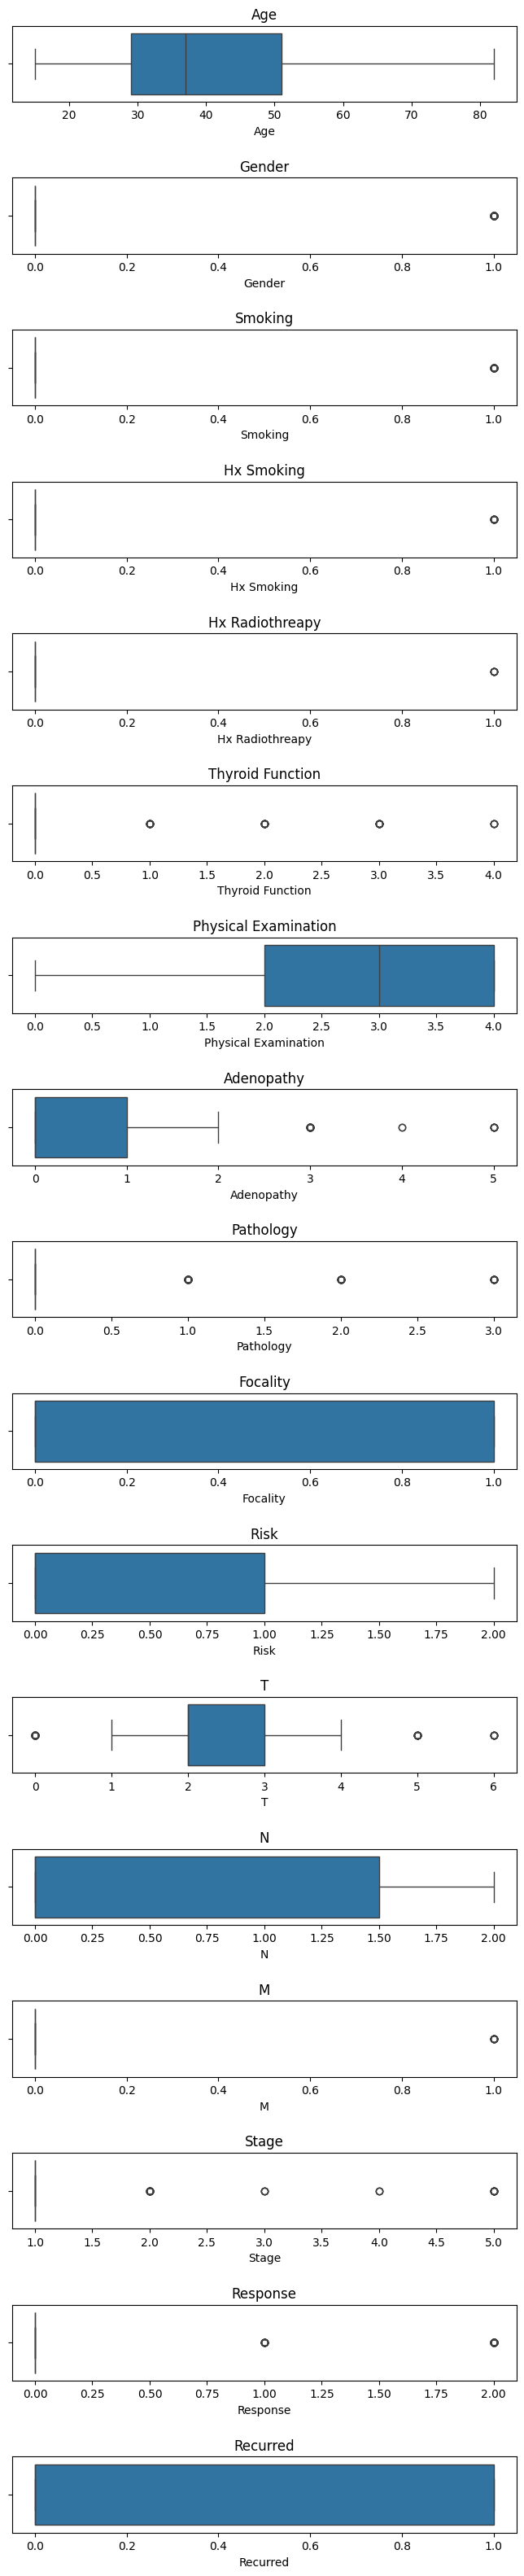

In [ ]:
# Ejecutamos la grafica de boxplot para identificar los outliers.
cols_num = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

fig, ax = plt.subplots(nrows=17, ncols=1, figsize=(8,40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

# **CON ESTO VERIFICAMOS QUE NO EXISTEN OUTLYERS A ANALIZAR.**

# **ANALISIS EXPLORATORIO**
# * RECORDAR QUE NUESTRO TARGET ES LA RECURRENCIA
# * NO OLVIDAR SUMAR CUALQUIER OTRO DATO DE VALOR

<Figure size 1500x1000 with 0 Axes>

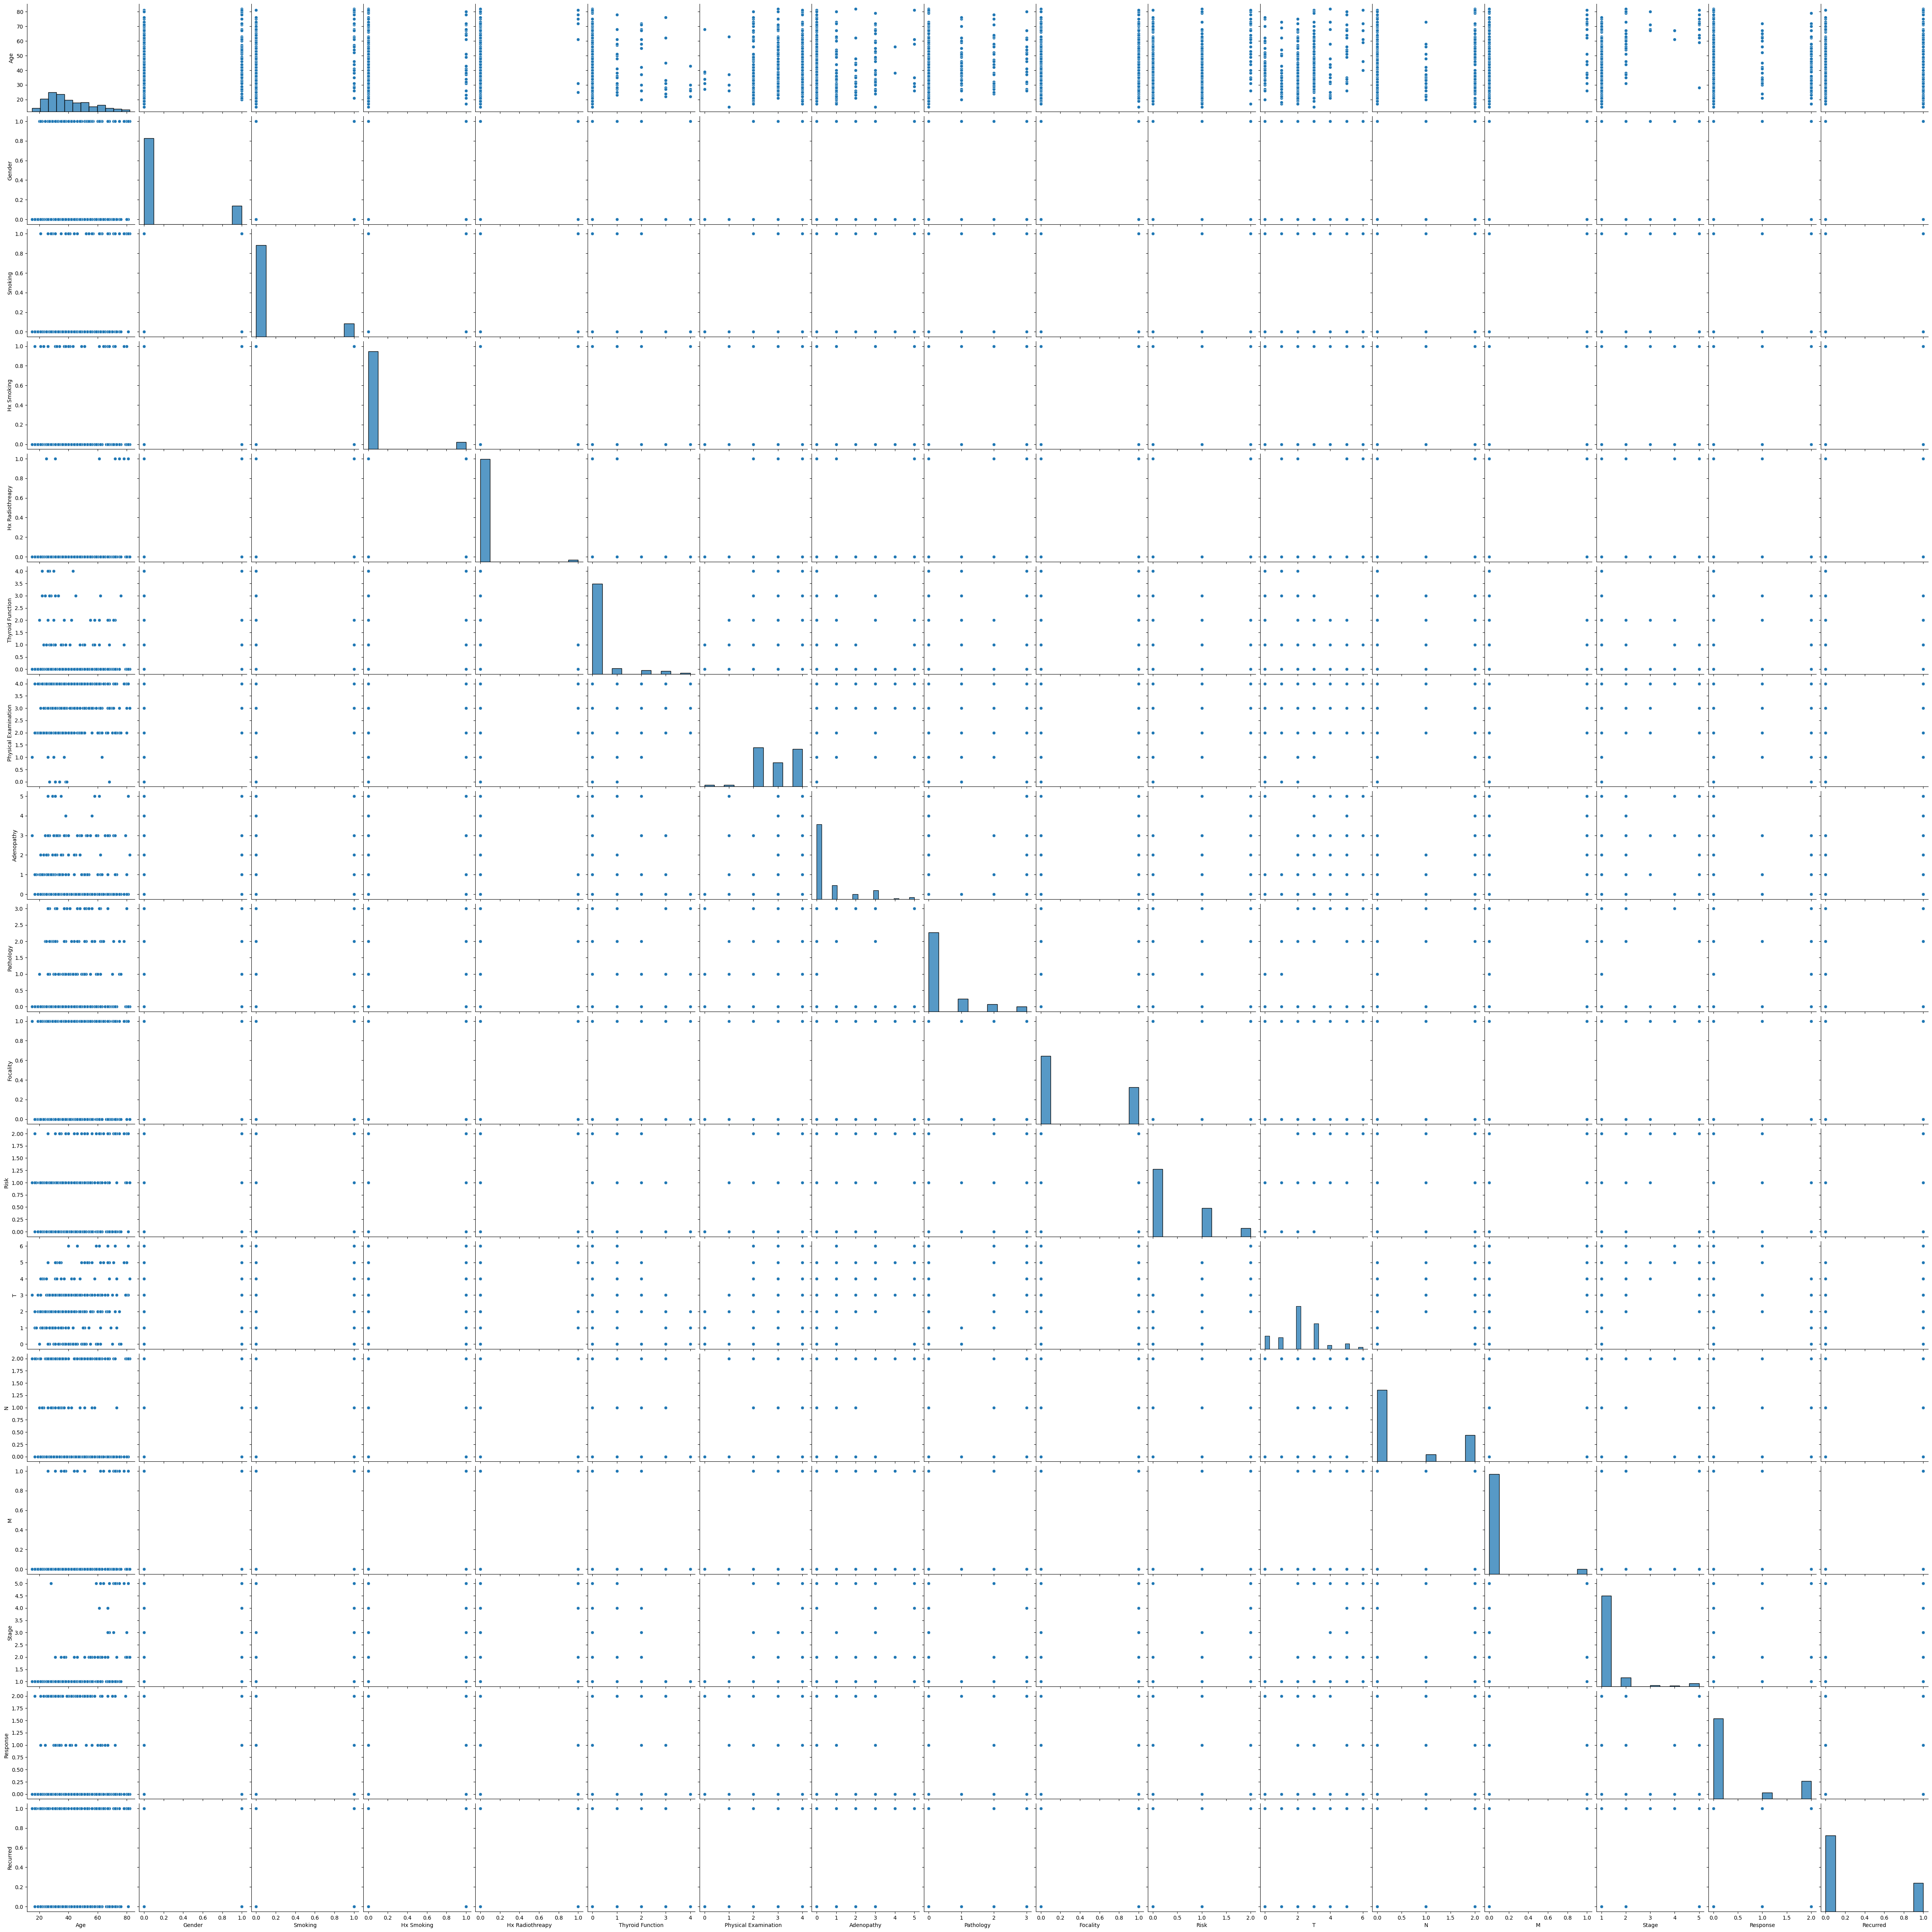

In [ ]:
# Ajustar el tamaño total del gráfico
plt.figure(figsize=(15, 10))  # Cambia el tamaño a tu preferencia

# Análisis exploratorio de los datos
sns.pairplot(df, height=3)  # Ajusta el tamaño de cada gráfico individual
plt.show()

# **ACA COMPLETA DAMI**

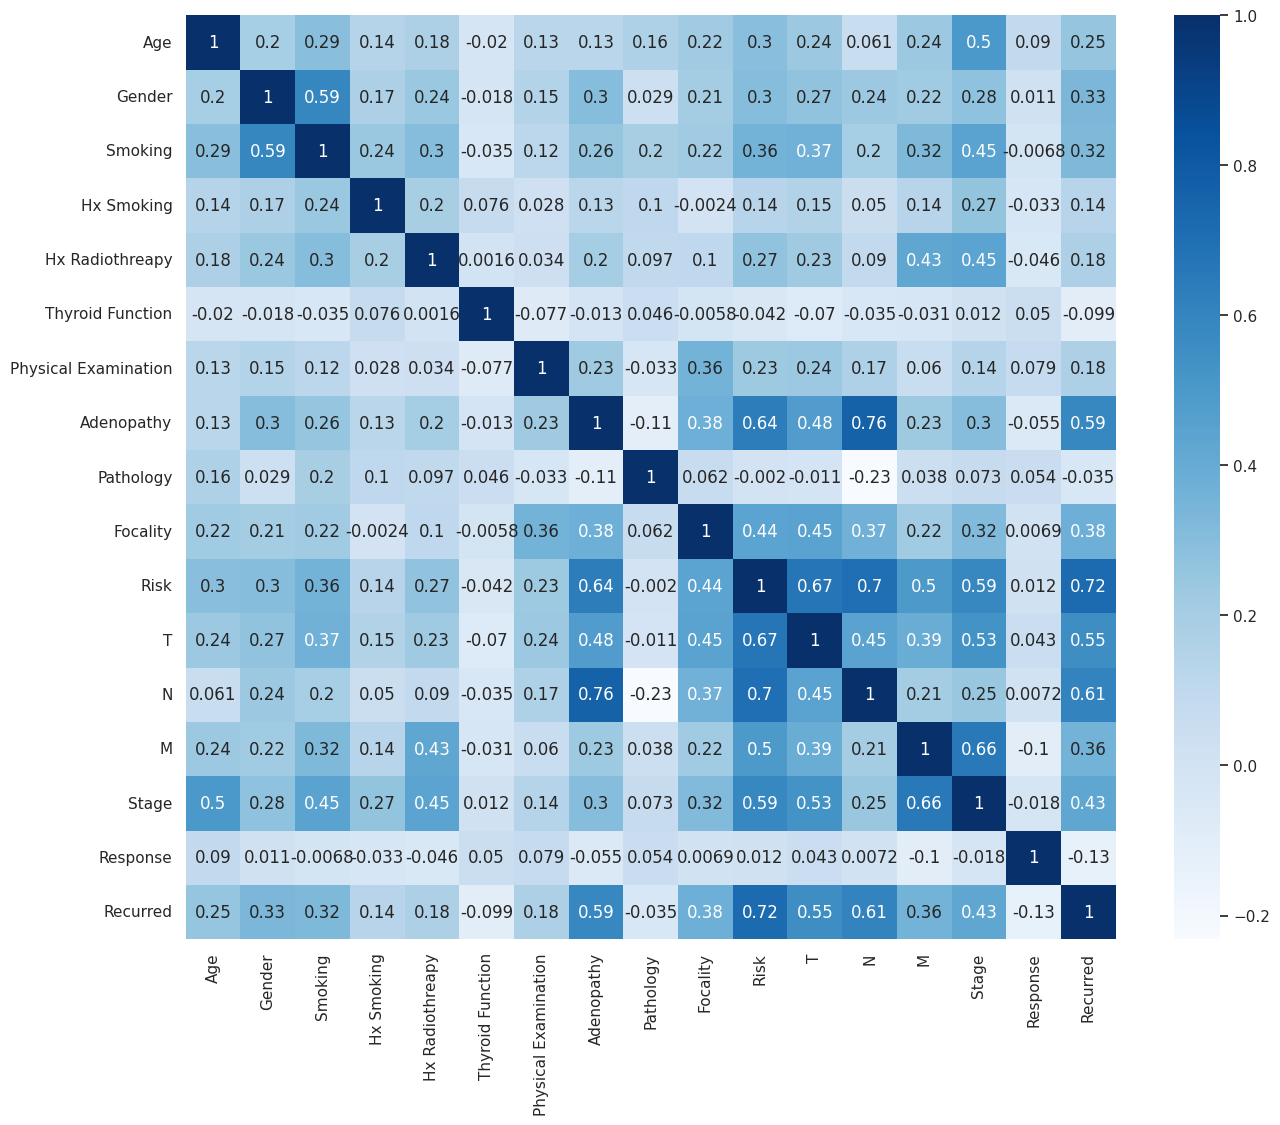

In [ ]:
# Seleccionar las columnas numéricas
numeric_cols = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                'Thyroid Function', 'Physical Examination', 'Adenopathy',
                'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage',
                'Response', 'Recurred']

# Calcular la matriz de correlación
cm = np.corrcoef(df[numeric_cols].values.T)

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 12))  # Ajusta el tamaño a tus preferencias

# Configurar el mapa de calor
sns.set(font_scale=1)  # Escala de fuente para los anotaciones
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols, cmap='Blues')

# Mostrar el gráfico
plt.show()

DE ESTO CONCLUIMOS LO SIGUIENTE:
PARECIERA QUE TENEMOS LAS SIGUIENTES CORRELACIONES MARCADAS:
  * RISK TAMBIEN TIENE UNA FUERTE CORRELACION
  * N TIENE UNA FUERTE CORRELACIÓN.
  * T
  * ADENOPATHY TAMMBIEN TIENE UNA FUERTE CORRELACION
  
  EN ORDEN SECUNDARIO
  * AGE
  * GENDER
  * SMOKING
  * FOCALITY

NOTA: STAGE NO PUEDE SER UTILIZADO YA QUE UNO DE SUS COMPONENTES ES "N"


VAMOS CON LAS FEATURE IMPORTANCE

Mean Accuracy from Cross-Validation: 0.8135345666991236
Feature Importances:
Age: 0.13383796252988525
Gender: 0.030818138685168604
Smoking: 0.01694856472540522
Hx Smoking: 0.002563041308217471
Hx Radiothreapy: 0.0013582530293641426
Thyroid Function: 0.02427935196265957
Physical Examination: 0.040941895583454374
Adenopathy: 0.12647443336509817
Pathology: 0.02121127342680679
Focality: 0.03356405131247651
Risk: 0.21134850053447707
T: 0.12115053037694676
N: 0.11555890375405921
M: 0.010269665008593524
Stage: 0.04308125322736785
Response: 0.06659418117001957


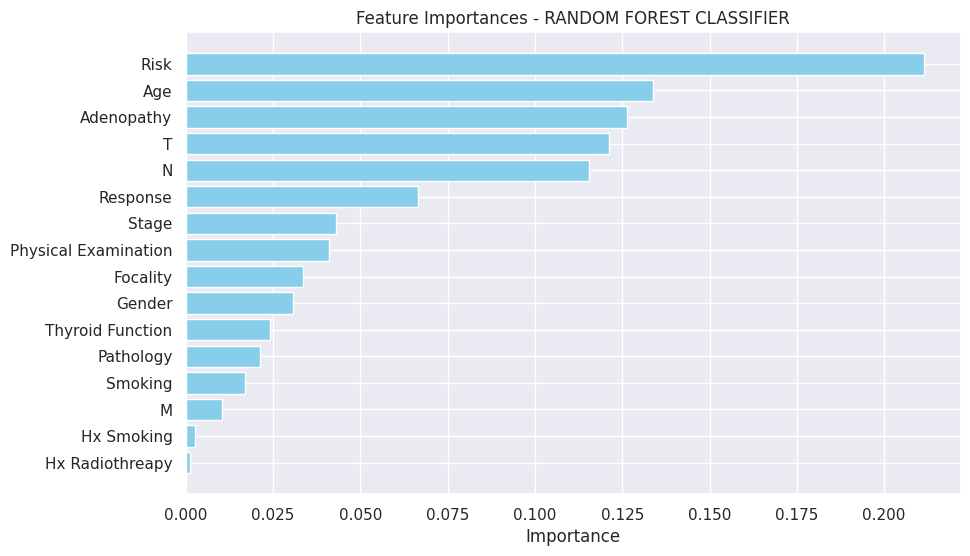

In [ ]:
# Define your features and target variable
features = [
    'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'
]
# LAS COLUMNAS QUE SACAMOS: 'rain_1h','snow_1h','clouds_all','weather_description_code','weather_main_code','mes','anio',

target = 'Recurred'

# Assuming df is your DataFrame containing the data
X = df[features]
y = df[target]

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation to assess feature importance
# Number of folds for cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf, X, y, cv=5)

# Fit the RandomForestClassifier to get feature importances
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Print mean accuracy from cross-validation
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

# Print feature importances
print("Feature Importances:")
for i, feature in enumerate(features):
    print(f"{feature}: {feature_importances[i]}")

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - RANDOM FOREST CLASSIFIER')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

CON ESTE FEATURE IMPORTANCE, OBTENEMOS Y REFORZAMOS LOS SIGUIENTES:
* RISK COMO PRIMER TERMINO
* AGE
* ADENOPATHY
* T
* N

Y EN UNA SEGUNDA INSTANCIA
* RESPONSE

Y SI ANALIZAMOS DE QUE DEPENDE LA MEJOR RESPUESTA A UN TRATAMIENTO?

Mean Accuracy from Cross-Validation: 0.6980525803310613
Feature Importances:
Age: 0.3395195800050392
Gender: 0.02415632048132736
Smoking: 0.020962964333157086
Hx Smoking: 0.015554348675361544
Hx Radiothreapy: 0.000973045616807998
Thyroid Function: 0.046147620806254085
Physical Examination: 0.10286596122264707
Adenopathy: 0.04396875089148782
Pathology: 0.05662600208311942
Focality: 0.055309227599942765
Risk: 0.04956747492237247
T: 0.1005324254806856
N: 0.06834285928875056
M: 0.0037220354689186056
Stage: 0.025661414037704906
Recurred: 0.04608996908642349


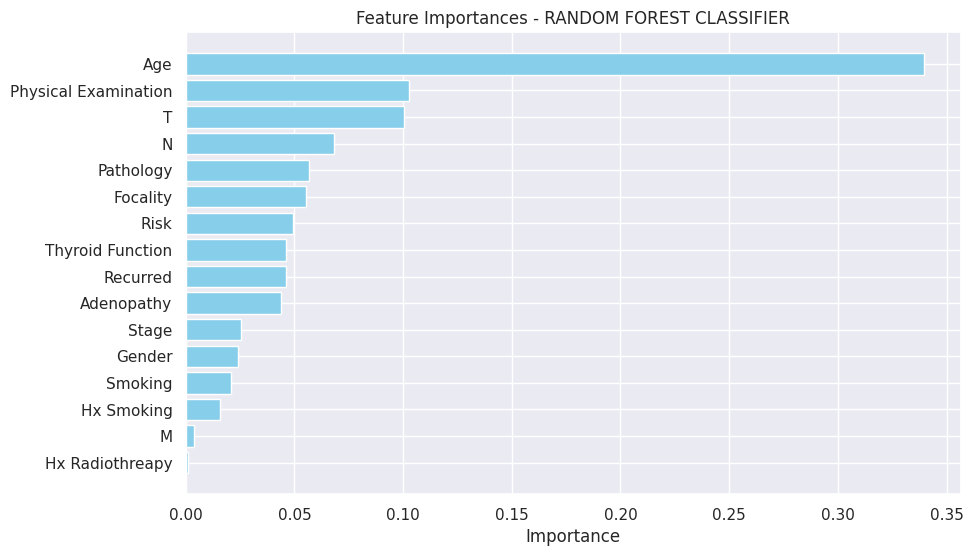

In [ ]:
# Define your features and target variable
features = [
    'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Recurred'
]
# LAS COLUMNAS QUE SACAMOS: 'rain_1h','snow_1h','clouds_all','weather_description_code','weather_main_code','mes','anio',

target = 'Response'

# Assuming df is your DataFrame containing the data
X = df[features]
y = df[target]

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation to assess feature importance
# Number of folds for cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf, X, y, cv=5)

# Fit the RandomForestClassifier to get feature importances
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Print mean accuracy from cross-validation
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

# Print feature importances
print("Feature Importances:")
for i, feature in enumerate(features):
    print(f"{feature}: {feature_importances[i]}")

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances - RANDOM FOREST CLASSIFIER')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

CON ESTO SABEMOS QUE EL MAYOR FACTOR PARA QUE EL TRATAMIENTO SEA EXITOSO, SEA LA EDAD.

PARA EL FINDE ANALIZAR ...

* BUSCAR EL MEJOR MODELO PARA PREDICCION
* ARMAR PPT
* ADECUAR COMENTARIOS EN EL CODIGO



# **AGREGADO 29/10 (JOSE)**

VAMOS A ARMAR GRUPOS DE 3 CATEGORIAS, PARA INTENTAR ENCONTRAR EL MEJOR GRUPO PARA PODER PREDECIR LA RECURRENCIA DEL CANCER.

In [ ]:
X = pd.DataFrame(df, columns=['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'])
y = df['Recurred']

In [ ]:
combinaciones = list(combinations(X.columns, 3)) #Creamos combinaciones de grupos de 3

In [ ]:
# Variables para almacenar el mejor resultado
mejor_combo = None
mejor_pocA = 0.0
mejor_pocB = 0.0
mejor_pm = 0.0

In [ ]:
# Iterar sobre todas las combinaciones
for combo in combinaciones:
    X_current = X[list(combo)] # Selecciona las variables independientes actuales

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_current, y, test_size=0.2)

    # Crear y entrenar el modelo
    lr_multiple = LinearRegression()
    lr_multiple.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = lr_multiple.predict(X_test)

    # Evaluar el modelo
    pocA = lr_multiple.coef_
    pocB = lr_multiple.intercept_
    pm = lr_multiple.score(X_train, y_train)

    # Verificar si este conjunto es el mejor hasta ahora
    if pm > mejor_pm:
        mejor_pocA = pocA
        mejor_pocB = pocB
        mejor_pm = pm
        mejor_combo = combo

# Mostrar los mejores resultados
print(f"Mejor combinación de variables independientes: {mejor_combo}")
print('Valor de las pendinetes o coeficientes "a":', mejor_pocA)
print('Valor de las pendinetes o coeficientes "b":', mejor_pocB)
print('Precision del modelo:', mejor_pm)

Mejor combinación de variables independientes: ('Risk', 'N', 'Response')
Valor de las pendinetes o coeficientes "a": [ 0.40157628  0.11302089 -0.08389986]
Valor de las pendinetes o coeficientes "b": 0.07256587033529957
Precision del modelo: 0.5967889795565622


CON ESTO ENTENDEMOS QUE LAS VARIABLES A TENER EN CUENTA A LA HORA DE INTENTAR PREDECIR SI UN CANCER VOLVERÁ A OCURRIR, SON:
* Hx Radiothreapy
* Risk
* N

PROBAMOS LO MISMO PERO PARA LA EFECTIVIDAD DE LOS TRATAMIENTOS.

In [ ]:
X = pd.DataFrame(df, columns=['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Recurred'])
y = df['Response']

In [ ]:
combinaciones = list(combinations(X.columns, 3)) #Creamos combinaciones de grupos de 3

In [ ]:
# Variables para almacenar el mejor resultado
mejor_combo = None
mejor_pocA = 0.0
mejor_pocB = 0.0
mejor_pm = 0.0

In [ ]:
# Iterar sobre todas las combinaciones
for combo in combinaciones:
    X_current = X[list(combo)] # Selecciona las variables independientes actuales

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_current, y, test_size=0.2)

    # Crear y entrenar el modelo
    lr_multiple = LinearRegression()
    lr_multiple.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = lr_multiple.predict(X_test)

    # Evaluar el modelo
    pocA = lr_multiple.coef_
    pocB = lr_multiple.intercept_
    pm = lr_multiple.score(X_train, y_train)

    # Verificar si este conjunto es el mejor hasta ahora
    if pm > mejor_pm:
        mejor_pocA = pocA
        mejor_pocB = pocB
        mejor_pm = pm
        mejor_combo = combo

# Mostrar los mejores resultados
print(f"Mejor combinación de variables independientes: {mejor_combo}")
print('Valor de las pendinetes o coeficientes "a":', mejor_pocA)
print('Valor de las pendinetes o coeficientes "b":', mejor_pocB)
print('Precision del modelo:', mejor_pm)

Mejor combinación de variables independientes: ('Risk', 'T', 'Recurred')
Valor de las pendinetes o coeficientes "a": [ 0.22036398  0.06316064 -0.60408478]
Valor de las pendinetes o coeficientes "b": 0.31222306195395944
Precision del modelo: 0.06960927497540692


# **OBVIAMENTE, ESTE NO ES EL CAMINO A SEGUIR.**